In [1]:
import pandas as pd
traf = pd.read_csv('Forbes-Project.csv')
TMC = pd.read_csv('TMC_Identification.csv')


In [2]:
fifth = TMC.loc[TMC.road == '5TH AVE',:]
fifth.head()

,tmc,road,direction,intersection,state,county,zip,start_latitude,start_longitude,end_latitude,end_longitude,miles,road_order,timezone_name,type,country,active_start_date,active_end_date
0,104+09237,5TH AVE,EASTBOUND,WILKINS AVE,PA,ALLEGHENY,15213,40.44653,-79.95191,40.44781,-79.93722,0.779806,3.0,America/New_York,P1.11,USA,2019-04-16 17:00:00-04:00,NaN
1,104+09238,5TH AVE,EASTBOUND,SHADY AVE,PA,ALLEGHENY,15232,40.44781,-79.93722,40.45289,-79.92074,0.940722,4.0,America/New_York,P1.11,USA,2019-04-16 17:00:00-04:00,NaN
2,104-09237,5TH AVE,WESTBOUND,WILKINS AVE,PA,ALLEGHENY,15232,40.45289,-79.92074,40.44781,-79.93722,0.940722,4.0,America/New_York,P1.11,USA,2019-04-16 17:00:00-04:00,NaN
3,104-09236,5TH AVE,WESTBOUND,BELLEFIELD AVE,PA,ALLEGHENY,15213,40.44781,-79.93722,40.44653,-79.95191,0.779806,5.0,America/New_York,P1.11,USA,2019-04-16 17:00:00-04:00,NaN
4,104-09235,5TH AVE,WESTBOUND,CRAFT AVE,PA,ALLEGHENY,15213,40.44653,-79.95191,40.43785,-79.96397,0.873665,6.0,America/New_York,P1.11,USA,2019-04-16 17:00:00-04:00,NaN


In [3]:
traf.rename(columns={'tmc_code':'tmc'}, inplace = True)

In [4]:
main = pd.merge(fifth,traf,on= 'tmc', how = 'inner')

In [5]:
main.rename(columns={'measurement_tstamp':'Date'}, inplace=True)

In [6]:
WST =  main.loc[main.direction == 'WESTBOUND',:]

In [7]:
import datetime as dt
WST['Date'] = pd.to_datetime(WST['Date'])
WST['hour'] = WST['Date'].dt.hour 

C:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
import datetime
t1 = pd.to_datetime('3-7-2018')
t2 = pd.to_datetime('5-21-2018')
t3 = pd.to_datetime('8-14-2018')

In [9]:
traf1= WST[WST["Date"].between(t1,t2)]
traf2 = WST[WST["Date"].between(t2,t3)]

In [10]:
MRNGG = traf1.loc[(traf1.hour >= 7) & (traf1.hour < 9),:]
AFT = traf1.loc[(traf1.hour >= 10) & (traf1.hour <15 ),:]
EVN = traf1.loc[(traf1.hour >= 16) & (traf1.hour <18 ),:]


Text(0,0.5,'Count of cars')

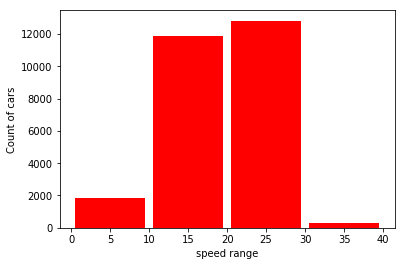

In [11]:
# for time between 7:00 AM - 9 : 00 PM
import matplotlib.pyplot as plt
%matplotlib inline
bin = [0,10,20,30,40]
plt.hist(MRNGG['speed'],rwidth = .9, bins = bin , color = 'r')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

Text(0,0.5,'Count of cars')

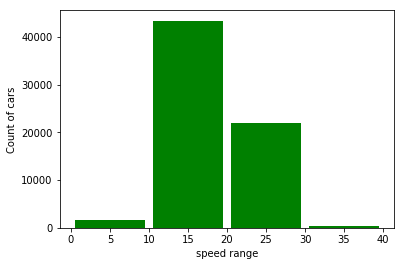

In [12]:
%matplotlib inline
bin = [0,10,20,30,40]
plt.hist(AFT['speed'],rwidth = .9, bins = bin , color = 'g')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

Text(0,0.5,'Count of cars')

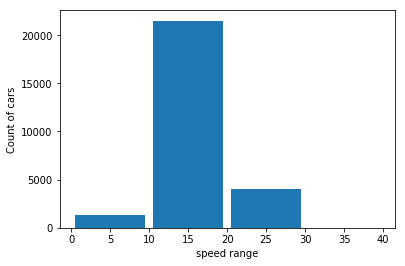

In [13]:
%matplotlib inline
bin = [0,10,20,30,40]
plt.hist(EVN['speed'],rwidth = .9, bins = bin )
plt.xlabel('speed range')
plt.ylabel('Count of cars')

In [14]:
MRNGG1 = traf2.loc[(traf2.hour >= 7) & (traf2.hour < 9),:]
AFT1 = traf2.loc[(traf2.hour >= 10) & (traf2.hour <15 ),:]
EVN1 = traf2.loc[(traf2.hour >= 16) & (traf2.hour <18 ),:]

Text(0,0.5,'Count of cars')

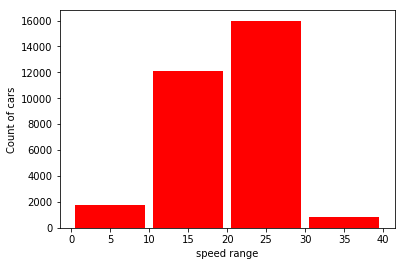

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
bin = [0,10,20,30,40]
plt.hist(MRNGG1['speed'],rwidth = .9, bins = bin , color = 'r')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

Text(0,0.5,'Count of cars')

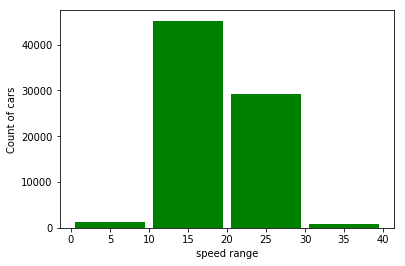

In [16]:
%matplotlib inline
bin = [0,10,20,30,40]
plt.hist(AFT1['speed'],rwidth = .9, bins = bin , color = 'g')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

Text(0,0.5,'Count of cars')

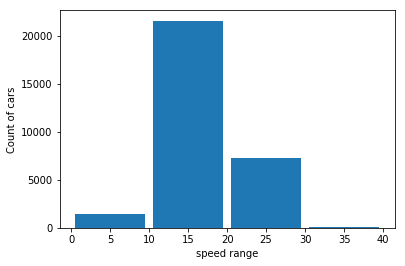

In [17]:
%matplotlib inline
bin = [0,10,20,30,40]
plt.hist(EVN1['speed'],rwidth = .9, bins = bin )
plt.xlabel('speed range')
plt.ylabel('Count of cars')